In [1]:
% cd /content/drive/MyDrive/Colab Notebooks/Data/

/content/drive/MyDrive/Colab Notebooks/Data


In [2]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [3]:
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [4]:
# Creating RugbyFootball Directory
os.mkdir('RugbyFootball')

In [5]:
# Unzip the data file and saving it to the RugbyFootball folder
!unzip rugbyfootball.zip -d RugbyFootball/

Archive:  rugbyfootball.zip
  inflating: RugbyFootball/input/test/rugby/rugby.1,225.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,226.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,227.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,228.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,229.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,230.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,231.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,232.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,233.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,234.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,235.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,236.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,237.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,238.jpg  
  inflating: RugbyFootball/input/test/rugby/rugby.1,239.jpg  
  inflating: RugbyFootball/input/test/rugb

In [6]:
base_dir = 'RugbyFootball/input/'
train_path = os.path.join(base_dir+'train/')
test_path = os.path.join(base_dir+'test/')

In [7]:
# Checking number of files in each directory
print("Files in train directory")
print("====================================")
for dir in os.listdir(train_path):
  print(dir, len(os.listdir(train_path+dir)))

print("Files in test directory")
print("====================================")
for dir in os.listdir(test_path):
  print(dir, len(os.listdir(test_path+dir)))

Files in train directory
rugby 1224
soccer 1224
Files in test directory
rugby 305
soccer 305


In [8]:
# Creating valdiation data
if not os.path.exists(base_dir+'validation'):
  os.makedirs(base_dir+'validation')

for dir in os.listdir(train_path):
  if not os.path.exists(base_dir+'validation/'+dir):
    os.makedirs(base_dir+'validation/'+dir)

# if not os.isdir(base_dir+'validation/'+'soccer'):
#   os.mkdirs(base_dir+'validation/'+'soccer')


import shutil
import random
for dir in os.listdir(train_path):
  print(dir)
  for i in range(150):
    random_img = random.sample(os.listdir(train_path+dir),1)
    shutil.move(train_path+dir+'/'+str(random_img[0]), base_dir+'validation/'+dir+'/'+str(random_img[0]))

rugby
soccer


In [ ]:
# shutil.move(base_dir+'validation/rugby/rugby.183.jpg', train_path+'rugby/rugby.183.jpg')
# shutil.move(base_dir+'validation/soccer/rugby.145.jpg', train_path+'soccer/rugby.145.jpg')

'RugbyFootball/input/train/soccer/rugby.145.jpg'

In [9]:
# Checking number of files in each directory
print("Files in train directory")
print("====================================")
for dir in os.listdir(train_path):
  print(dir, len(os.listdir(train_path+dir)))

print("Files in test directory")
print("====================================")
for dir in os.listdir(test_path):
  print(dir, len(os.listdir(test_path+dir)))

print("Files in validation directory")
print("====================================")
for dir in os.listdir(base_dir+'validation/'):
  print(dir, len(os.listdir(base_dir+'validation/'+dir)))

Files in train directory
rugby 1074
soccer 1074
Files in test directory
rugby 305
soccer 305
Files in validation directory
rugby 150
soccer 150


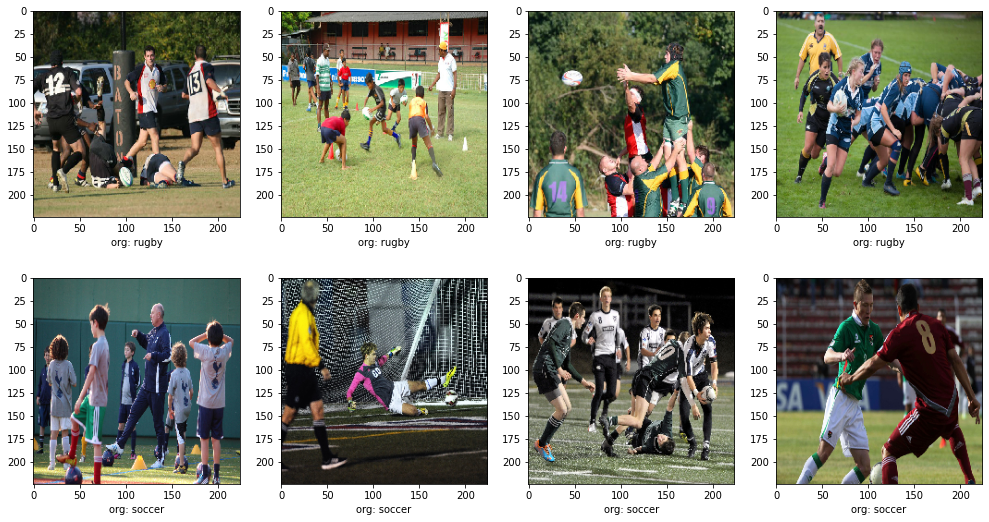

In [10]:
# Show some random files from all categories
import matplotlib.pyplot as plt
import random
k=1
plt.figure(figsize=(17,9))
for dir in os.listdir(train_path):
  for i in range(4):
    plt.subplot(2,4,k)
    random_img = random.sample(os.listdir(train_path+dir),1)
    img = load_img(train_path+dir+'/'+random_img[0], target_size=(224,224))
    img = img_to_array(img)/255.
    img_arr = np.array([img])
    plt.imshow(img_arr[0])
    plt.xlabel("org: {}".format(dir))
    k+=1
    #print(random_img)

plt.show()


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   rescale=1/255.,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    )
val_generator = test_datagen.flow_from_directory(base_dir+'validation/',
                                                 target_size=(224,224),
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 )

Found 2148 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'rugby': 0, 'soccer': 1}

In [14]:
val_generator.class_indices

{'rugby': 0, 'soccer': 1}

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', patience=5, mode='max')

In [ ]:
hist = model.fit(train_generator, epochs=100,
                 validation_data=val_generator)

Epoch 1/100
68/68 [==============================] - 68s 792ms/step - loss: 0.7267 - accuracy: 0.5619 - val_loss: 0.6737 - val_accuracy: 0.6700
Epoch 2/100
68/68 [==============================] - 54s 800ms/step - loss: 0.6403 - accuracy: 0.6429 - val_loss: 0.6319 - val_accuracy: 0.6600
Epoch 3/100
68/68 [==============================] - 53s 777ms/step - loss: 0.6098 - accuracy: 0.6811 - val_loss: 0.6188 - val_accuracy: 0.6667
Epoch 4/100
68/68 [==============================] - 53s 777ms/step - loss: 0.5873 - accuracy: 0.6858 - val_loss: 0.6059 - val_accuracy: 0.6867
Epoch 5/100
68/68 [==============================] - 52s 770ms/step - loss: 0.5636 - accuracy: 0.6997 - val_loss: 0.6240 - val_accuracy: 0.6533
Epoch 6/100
68/68 [==============================] - 59s 868ms/step - loss: 0.5468 - accuracy: 0.7304 - val_loss: 0.5906 - val_accuracy: 0.6867
Epoch 7/100
68/68 [==============================] - 73s 1s/step - loss: 0.5497 - accuracy: 0.7174 - val_loss: 0.5700 - val_accuracy: 0.

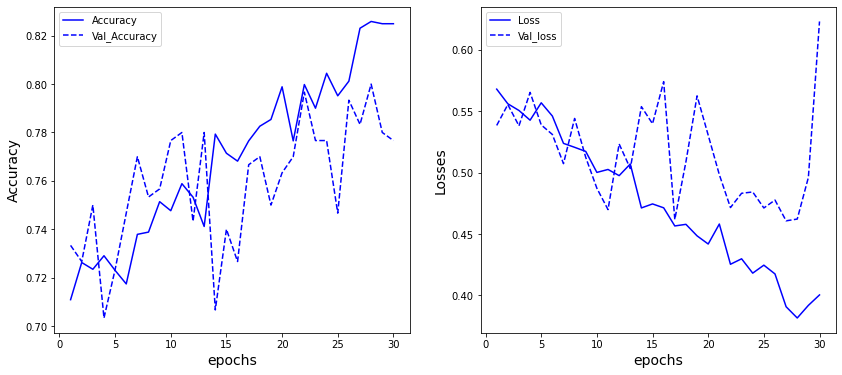

In [ ]:
# Visualizing Accuracy and loss

acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

epochs = np.arange(1,len(acc)+1)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, val_acc, 'b--', label='Val_Accuracy')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'b--', label='Val_loss')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Losses", fontsize=14)

plt.legend()
plt.show()

In [ ]:
model.evaluate(val_generator)

10/10 [==============================] - 8s 720ms/step - loss: 0.6232 - accuracy: 0.7767


[0.6231639385223389, 0.7766666412353516]

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, filepath='RugbyVsSoccer.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 610 images belonging to 2 classes.


In [ ]:
testloss, testaccuracy = model.evaluate(test_generator)
print("\nTest Accuracy: {} and loss: {}".format(testaccuracy, testloss))

20/20 [==============================] - 124s 6s/step - loss: 0.6010 - accuracy: 0.7525


[0.6010221838951111, 0.7524589896202087]

In [ ]:
pred = model.predict(test_generator)

In [ ]:
#y_pred = [np.argmax(i) for i in pred]
y_pred = np.argmax(pred, axis=1)

In [ ]:
pred[:10]

array([[0.65147495, 0.17953071],
       [0.97832584, 0.04666497],
       [0.8686152 , 0.12373407],
       [0.35470665, 0.76498556],
       [0.960851  , 0.01034602],
       [0.93629295, 0.1140102 ],
       [0.4814394 , 0.870605  ],
       [0.79802346, 0.22822748],
       [0.31718004, 0.8193179 ],
       [0.7027176 , 0.12877254]], dtype=float32)

In [ ]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [ ]:
y_true = test_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred)
cm

array([[186, 119],
       [172, 133]])

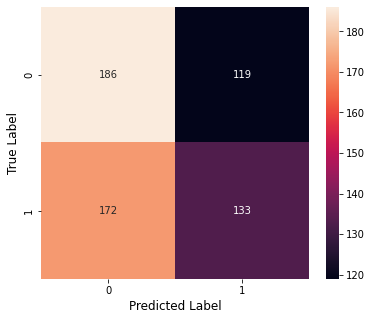

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       305
           1       0.53      0.44      0.48       305

    accuracy                           0.52       610
   macro avg       0.52      0.52      0.52       610
weighted avg       0.52      0.52      0.52       610



# Train Model using Transfer Learning

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model_mnet = Sequential()
model_mnet.add(base_model)
model_mnet.add(GlobalAveragePooling2D())
model_mnet.add(Dense(128, activation='relu'))
model_mnet.add(Dropout(0.5))
model_mnet.add(Dense(2, activation='softmax'))

model_mnet.summary()

In [ ]:
model_mnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'accuracy', min_delta=0.01, patience=5, mode='max')

In [ ]:
hist_mnet = model_mnet.fit(train_generator, epochs=30, validation_data=val_generator)

## Evaluating Result

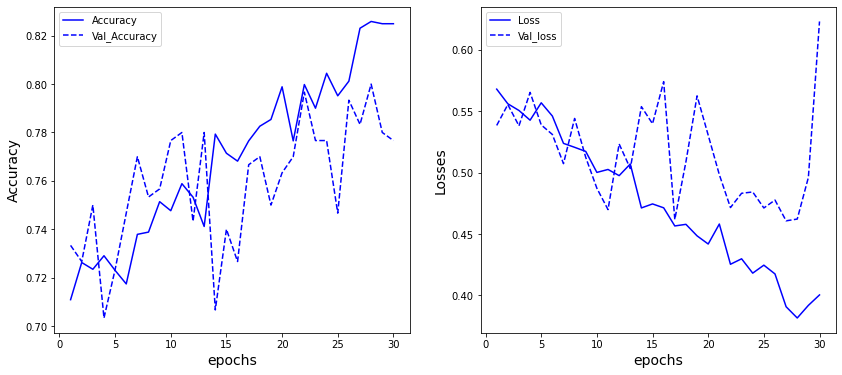

In [ ]:
# Visualizing Accuracy and loss

acc = hist_mnet.history['accuracy']
loss = hist_mnet.history['loss']
val_acc = hist_mnet.history['val_accuracy']
val_loss = hist_mnet.history['val_loss']

epochs = np.arange(1,len(acc)+1)

plt.figure(figsize=(14,6))
plt.suptitle("MobileNet_V2 Model training")
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, val_acc, 'b--', label='Val_Accuracy')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'b--', label='Val_loss')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Losses", fontsize=14)
plt.title("Loss vs Epochs")
plt.legend()

plt.show()

In [ ]:
model_mnet.evaluate(val_generator)

10/10 [==============================] - 8s 720ms/step - loss: 0.6232 - accuracy: 0.7767


[0.6231639385223389, 0.7766666412353516]

In [ ]:
from tensorflow.keras.models import save_model
save_model(model_mnet, filepath='RugbyVsSoccer_mnet.h5')

In [ ]:
print("MobileNet_V2 model evaluation")

testloss, testaccuracy = model.evaluate(test_generator)
print("\nTest Accuracy: {} and loss: {}".format(testaccuracy, testloss))

20/20 [==============================] - 124s 6s/step - loss: 0.6010 - accuracy: 0.7525


[0.6010221838951111, 0.7524589896202087]

In [ ]:
pred_mnet = model_mnet.predict(test_generator)

In [ ]:
#y_pred = [np.argmax(i) for i in pred]
y_pred_mnet = np.argmax(pred_mnet, axis=1)

In [ ]:
pred_mnet[:10]

array([[0.65147495, 0.17953071],
       [0.97832584, 0.04666497],
       [0.8686152 , 0.12373407],
       [0.35470665, 0.76498556],
       [0.960851  , 0.01034602],
       [0.93629295, 0.1140102 ],
       [0.4814394 , 0.870605  ],
       [0.79802346, 0.22822748],
       [0.31718004, 0.8193179 ],
       [0.7027176 , 0.12877254]], dtype=float32)

In [ ]:
y_pred_mnet[:10]

[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [ ]:
y_true = test_generator.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred_mnet)
cm

array([[186, 119],
       [172, 133]])

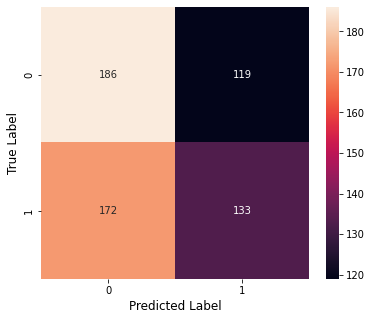

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_mnet))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       305
           1       0.53      0.44      0.48       305

    accuracy                           0.52       610
   macro avg       0.52      0.52      0.52       610
weighted avg       0.52      0.52      0.52       610

